In [9]:
import tensorflow as tf
from tensorflow import keras
import matplotlib

In [19]:
import graphviz

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import torch
import torch.nn as nn
import torch.utils.data

In [6]:
#!pip install table_ocr

In [7]:
# !pip install PyPDF2

In [19]:
from PyPDF2 import PdfFileReader

# creating a pdf file object
pdfObject = open('/Users/Asus/Documents/Atmel Studio/OCR/Report_1.pdf', 'rb')

# creating a pdf reader object
pdfReader = PdfFileReader(pdfObject)

# Extract and concatenate each page's content
text=''
for i in range(0,pdfReader.numPages):
    # creating a page object
    pageObject = pdfReader.getPage(i)
    # extracting text from page
    text += pageObject.extractText()
#print(text)

In [5]:
# !pip install tabula-py
# !pip install tabulate

In [6]:
from tabula import read_pdf
from tabulate import tabulate
import pandas as pd
import io

# Read the only the page n°6 of the file
import tabula

tabula.convert_into('/Users/Asus/Documents/Atmel Studio/OCR/Report_1.pdf', "Plants_Distribution.csv", 
                    output_format="csv", pages = "1")

# # Transform the result into a string table format
# table = tabulate(food_calories)

# # Transform the table into dataframe
# df = pd.read_fwf(io.StringIO(table))

# # Save the final result as excel file
# df.to_excel("food_calories.xlsx")

In [8]:
pdf_path = "/Users/Asus/Documents/Atmel Studio/OCR/Report_1.pdf"
tabula.read_pdf(pdf_path, stream=True)

'pages' argument isn't specified.Will extract only from page 1 by default.


[                               Unnamed: 0  Energy Generation  Unnamed: 1  \
 0  Complex wise generation and energy mix                NaN         NaN   
 1                    K-M Complex 5.38 GWh             11.83%         NaN   
 2               Mahaweli Complex 9.29 GWh       20.45% Hydro       15.39   
 3               Samanala Complex 0.72 GWh              1.58%         NaN   
 4                Thermal Complex 4.14 GWh              9.11%         NaN   
 5                          Coal 11.23 GWh     24.72% Thermal       29.00   
 6                   IPP Thermal 13.64 GWh             30.02%         NaN   
 7                Solar PV (Bulk) 0.32 GWh  0.69% Solar(Bulk)        0.32   
 8                           Wind 0.73 GWh         1.60% Wind        0.73   
 
   Unnamed: 2 Unnamed: 3  
 0        NaN        NaN  
 1        NaN        NaN  
 2        GWh     33.87%  
 3        NaN        NaN  
 4        NaN        NaN  
 5        GWh     63.84%  
 6        NaN        NaN  
 7        GW

In [16]:
# !pip install ghostscript
#!pip install camelot-py

In [7]:
import camelot
import ghostscript
from camelot import read_pdf

# Get all the tables within the file
all_tables = read_pdf('/Users/Asus/Documents/Atmel Studio/OCR/Report_1.pdf', pages = 'all')

# Show the total number of tables in the file
print("Total number of table: {}".format(all_tables.n))

# print all the tables in the file
for t in range(all_tables.n):
    print("Table n°{}".format(t))
    print((all_tables[t].df).head())
    
for i in range(all_tables.n):
    all_tables[i].to_csv(f'PowerGeneration_{i+1}.csv', index=True)

for t in range(all_tables.n):
    print (all_tables[t].parsing_report)
    print ('\n')

Total number of table: 4
Table n°0
                  0          1       2        3           4       5
0       K-M Complex   5.38 GWh  11.83%    Hydro  15.39\nGWh  33.87%
1  Mahaweli Complex   9.29 GWh  20.45%                             
2  Samanala Complex   0.72 GWh   1.58%                             
3   Thermal Complex   4.14 GWh   9.11%  Thermal  29.00\nGWh  63.84%
4              Coal  11.23 GWh  24.72%                             
Table n°1
                                    0            1     2  \
0  Complex/Location wise contribution                      
1                                         MW\nMVAr         
2                   K-M Complex Hydro  281.3\n63.9         
3              Mahaweli Complex Hydro  689.2\n52.3         
4                      Samanala Hydro        154.5  26.8   

                                    3       4      5      6  
0  Technology wise contribution of MW                        
1                                          MW   MVAr   MW %  


<ipython-input-11-5879e9a8949f>:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  camelot.plot(all_tables[2], kind='grid').show()


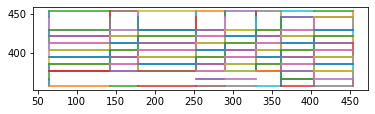

In [11]:
camelot.plot(all_tables[2], kind='grid').show()

In [1]:
#!pip install pdf2image

In [2]:
import camelot
import ghostscript

# PDF file to extract tables from (from command-line)
file = "/Users/Asus/Documents/Atmel Studio/OCR/foo.pdf"

# extract all the tables in the PDF file
tables = camelot.read_pdf(file)

# # number of tables extracted
print("Total tables extracted:", tables.n)

# # print the first table as Pandas DataFrame
print(tables[0].df)

# # export individually as CSV
tables[0].to_csv("foo.csv")
# # export individually as Excel (.xlsx extension)
# tables[0].to_excel("foo.xlsx")

# # or export all in a zip
# tables.export("foo.csv", f="csv", compress=True)

# # export to HTML
# tables.export("foo.html", f="html")

Total tables extracted: 1
              0            1                2                     3  \
0  Cycle \nName  KI \n(1/km)  Distance \n(mi)  Percent Fuel Savings   
1                                                  Improved \nSpeed   
2        2012_2         3.30              1.3                  5.9%   
3        2145_1         0.68             11.2                  2.4%   
4        4234_1         0.59             58.7                  8.5%   
5        2032_2         0.17             57.8                 21.7%   
6        4171_1         0.07            173.9                 58.1%   

                   4                  5                 6  
0                                                          
1  Decreased \nAccel  Eliminate \nStops  Decreased \nIdle  
2               9.5%              29.2%             17.4%  
3               0.1%               9.5%              2.7%  
4               1.3%               8.5%              3.3%  
5               0.3%               2.7%      

In [5]:
# PDF file to extract tables from (from command-line)
file2 = "/Users/Asus/Documents/Atmel Studio/OCR/Report_1.pdf"

# extract all the tables in the PDF file
tables = camelot.read_pdf(file2)

# # number of tables extracted
print("Total tables extracted:", tables.n)

# # print the first table as Pandas DataFrame
print(tables[0].df)

# export individually as CSV

# for i in tables:
# tables[i].to_csv("report.csv")

for i in range(tables.n):
    tables[i].to_csv(f'PowerGeneration_{i+1}.csv', index=True)

# export individually as Excel (.xlsx extension)
tables[0].to_excel("foo.xlsx")

# or export all in a zip
tables.export("foo.csv", f="csv", compress=True)

# export to HTML
tables.export("powergen.html", f="html")

Total tables extracted: 3
                  0          1       2                  3           4       5
0       K-M Complex   5.38 GWh  11.83%              Hydro  15.39\nGWh  33.87%
1  Mahaweli Complex   9.29 GWh  20.45%                                       
2  Samanala Complex   0.72 GWh   1.58%                                       
3   Thermal Complex   4.14 GWh   9.11%            Thermal  29.00\nGWh  63.84%
4              Coal  11.23 GWh  24.72%                                       
5       IPP Thermal  13.64 GWh  30.02%                                       
6   Solar PV (Bulk)   0.32 GWh          0.69% Solar(Bulk)   0.32\nGWh   0.69%
7              Wind   0.73 GWh   1.60%               Wind   0.73\nGWh   1.60%
